In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [99]:
base = "datasets/"
data = pd.read_csv(base+"train.csv")
data=data.drop(columns = ['Loan_ID'])

In [51]:
# print(data.describe())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


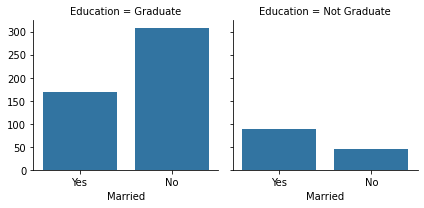

In [105]:
data['Credit_History'] = data['Credit_History'].astype('object')
columns = data.columns
data.describe(include=[np.object])
# data['Credit_History']
grid = sns.FacetGrid(data,col = 'Education')
grid.map(sns.countplot, 'Married')

In [102]:
data.isnull().sum().sort_values(ascending= False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [64]:
number_data = []
cate_data = []
for i, c in enumerate(data.dtypes):
    if c ==object:
        cate_data.append(data.iloc[:,i])
    else :
        number_data.append(data.iloc[:,i])

In [65]:
cate_data =pd.DataFrame(cate_data).transpose()
num_data = pd.DataFrame(number_data).transpose()


In [66]:
cate_data = cate_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
num_data = num_data.apply(lambda x: x.fillna(x.mean()))
target_dict = {'Y': 1, 'N': 0}
target = cate_data['Loan_Status']
cate_data.drop(columns=['Loan_Status'], axis = 1, inplace=True)
target = target.map(target_dict)


In [68]:
le = LabelEncoder()
for i in cate_data:
    cate_data[i] = le.fit_transform(cate_data[i])


In [71]:
df = pd.concat([cate_data, num_data, target], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,146.412162,360.0,1
1,1,1,1,0,0,1,0,4583.0,1508.0,128.000000,360.0,0
2,1,1,0,0,1,1,2,3000.0,0.0,66.000000,360.0,1
3,1,1,0,1,0,1,2,2583.0,2358.0,120.000000,360.0,1
4,1,0,0,0,0,1,2,6000.0,0.0,141.000000,360.0,1


In [73]:
X= pd.concat([cate_data, num_data], axis = 1)
y = target

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size  = 0.2, random_state=42)

In [88]:
model = {
    "Logisticregression": LogisticRegression(random_state = 42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(random_state=42),
    'DecisionTree': DecisionTreeClassifier(max_depth = 10, random_state=42)
}

In [96]:
def loss(y_true, y_pred):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [94]:
def train_eval_models(models, X_train, y_train):
    for name,model in models.items():
        print(name," :")
        model.fit(X_train,y_train)
        loss(y_train, model.predict(X_train))
        print("_"*30)

In [97]:
train_eval_models(model, X_train,y_train)

Logisticregression  :
  pre: 0.801
  rec: 0.980
  f1: 0.882
  loss: 6.331
  acc: 0.817
______________________________
KNN  :
  pre: 0.762
  rec: 0.906
  f1: 0.828
  loss: 9.075
  acc: 0.737
______________________________
SVC  :


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


  pre: 0.701
  rec: 1.000
  f1: 0.824
  loss: 10.270
  acc: 0.703
______________________________
DecisionTree  :
  pre: 0.900
  rec: 0.997
  f1: 0.946
  loss: 2.743
  acc: 0.921
______________________________
